In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpat
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [85]:
gpt_4_zero_shot = np.array(
    [
        [120, 120, 80, 80, 160],
        [120, 160, 160, 120, 200],
        [160, 160, 160, 160, 200],
        [160, 160, 160, 160, 160],
        [160, 160, 160, 160, 200],
    ]
)

gemini_1_5_pro_zero_shot = np.array(
    [
        [80, 120, 80, 40, 200],
        [120, 160, 120, 80, 200],
        [160, 160, 120, 120, 200],
        [160, 200, 160, 120, 200],
        [160, 200, 160, 200, 200],
    ]
)

valores_reais_zero_shot = np.array(
    [
        [0, 0, 0, 0, 0],
        [120, 120, 80, 80, 0],
        [120, 120, 80, 120, 160],
        [160, 160, 200, 160, 120],
        [200, 200, 200, 200, 200],
    ]
)

In [86]:
gpt_4_few_shot = np.array(
    [
        [40, 40, 40, 40, 0],
        [40, 80, 80, 80, 160],
        [80, 120, 80, 80, 160],
        [120, 160, 160, 120, 200],
        [160, 160, 160, 160, 200],
    ]
)

gemini_1_5_pro_few_shot = np.array(
    [
        [0, 0, 0, 0, 0],
        [40, 40, 40, 40, 40],
        [80, 120, 80, 40, 120],
        [160, 160, 120, 120, 80],
        [160, 160, 160, 160, 160],
    ]
)

valores_reais_few_shot = np.array(
    [
        [0, 0, 0, 0, 0],
        [160, 40, 40, 120, 40],
        [160, 120, 120, 120, 80],
        [160, 160, 160, 200, 120],
        [200, 200, 200, 200, 200],
    ]
)

In [87]:
modelos_testados = [
    "GPT-4 Zero-Shot",
    "GPT-4 Few-Shot",
    "Gemini-1.5-Pro Zero-Shot",
    "Gemini-1.5-Pro Few-Shot",
]

mae_zs = lambda pred_val: mean_absolute_error(valores_reais_zero_shot, pred_val)
mae_fs = lambda pred_val: mean_absolute_error(valores_reais_few_shot, pred_val)

mse_zs = lambda pred_val: mean_squared_error(valores_reais_zero_shot, pred_val)
mse_fs = lambda pred_val: mean_squared_error(valores_reais_few_shot, pred_val)

r2_zs = lambda pred_val: r2_score(valores_reais_zero_shot, pred_val)
r2_fs = lambda pred_val: r2_score(valores_reais_few_shot, pred_val)

rmse_zs = lambda pred_val: np.sqrt(mse_zs(pred_val))
rmse_fs = lambda pred_val: np.sqrt(mse_fs(pred_val))

r2_zs = lambda pred_val: r2_score(valores_reais_zero_shot, pred_val)
r2_fs = lambda pred_val: r2_score(valores_reais_few_shot, pred_val)


resultados = pd.DataFrame(
    {
        "Modelos": modelos_testados,
        "Erro médio abs.": [
            mae_zs(gpt_4_zero_shot),
            mae_fs(gpt_4_few_shot),
            mae_zs(gemini_1_5_pro_zero_shot),
            mae_fs(gemini_1_5_pro_few_shot),
        ],
        "Erro médio quadr.": [
            mse_zs(gpt_4_zero_shot),
            mse_fs(gpt_4_few_shot),
            mse_zs(gemini_1_5_pro_zero_shot),
            mse_fs(gemini_1_5_pro_few_shot),
        ],
        "Raiz do EMQ": [
            rmse_zs(gpt_4_zero_shot),
            rmse_fs(gpt_4_few_shot),
            rmse_zs(gemini_1_5_pro_zero_shot),
            rmse_fs(gemini_1_5_pro_few_shot),
        ],
        "Coef. de det.": [
            r2_zs(gpt_4_zero_shot),
            r2_fs(gpt_4_few_shot),
            r2_zs(gemini_1_5_pro_zero_shot),
            r2_fs(gemini_1_5_pro_few_shot),
        ],
    }
)


resultados.to_csv("resultados.csv", index=False)


resultados

,Modelos,Erro médio abs.,Erro médio quadr.,Raiz do EMQ,Coef. de det.
0,GPT-4 Zero-Shot,56.0,5568.0,74.619032,0.022237
1,GPT-4 Few-Shot,44.8,3072.0,55.425626,0.383111
2,Gemini-1.5-Pro Zero-Shot,49.6,5312.0,72.883469,0.111856
3,Gemini-1.5-Pro Few-Shot,32.0,2176.0,46.647615,0.573975


In [88]:
resultados.describe()

,Erro médio abs.,Erro médio quadr.,Raiz do EMQ,Coef. de det.
count,4.000000,4.000000,4.000000,4.000000
mean,45.600000,4032.000000,62.393936,0.272795
std,10.161365,1669.733711,13.613562,0.252692
min,32.000000,2176.000000,46.647615,0.022237
25%,41.600000,2848.000000,53.231123,0.089451
50%,47.200000,4192.000000,64.154547,0.247483
75%,51.200000,5376.000000,73.317360,0.430827
max,56.000000,5568.000000,74.619032,0.573975


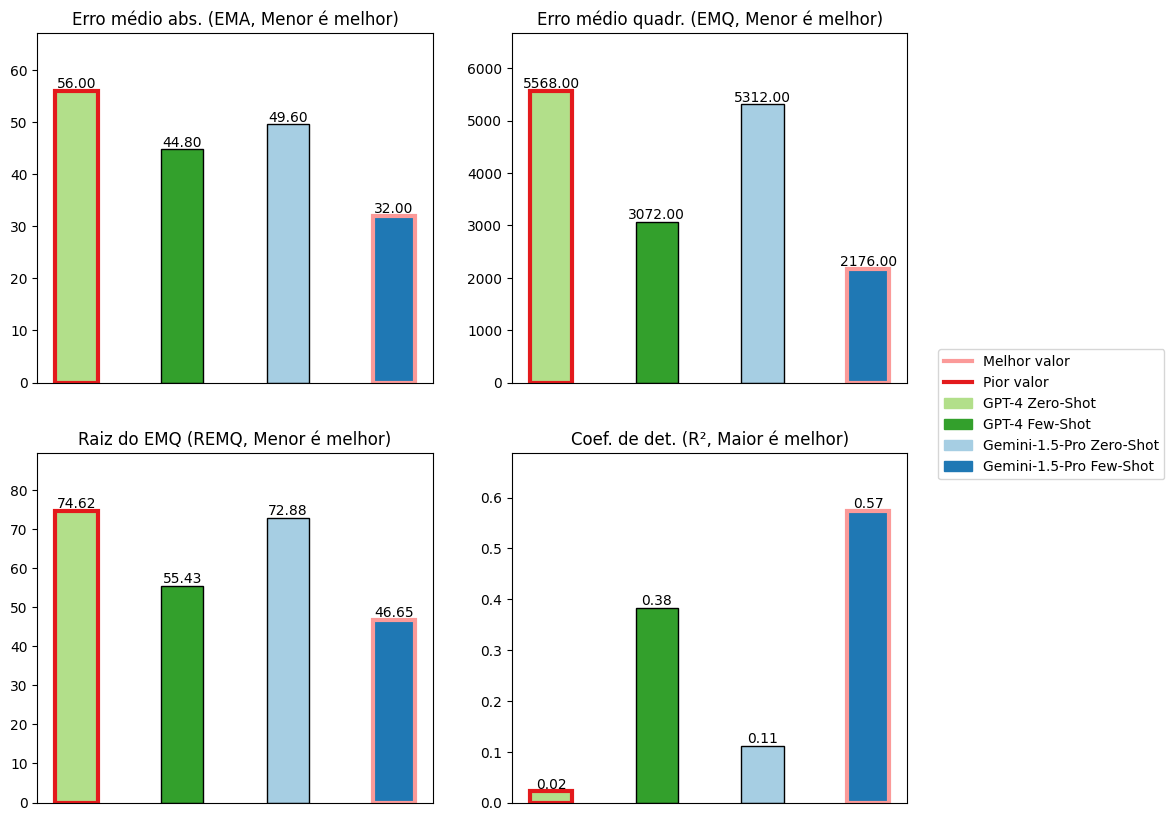

In [89]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(right=0.85)

metricas = [
    "Erro médio abs.",
    "Erro médio quadr.",
    "Raiz do EMQ",
    "Coef. de det. (R²)",
]

colors = [
    "#b2df8a",
    "#33a02c",
    "#a6cee3",
    "#1f78b4",
]

metricas_info = [
    ("Erro médio abs.", "EMA, Menor é melhor"),
    ("Erro médio quadr.", "EMQ, Menor é melhor"),
    ("Raiz do EMQ", "REMQ, Menor é melhor"),
    ("Coef. de det.", "R², Maior é melhor"),
]

melhor_cor = "#fb9a99"
pior_cor = "#e31a1c"

for ax, (metrica, info) in zip(axs.flat, metricas_info):

    ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)

    barras = ax.bar(
        resultados["Modelos"],
        resultados[metrica],
        width=0.4,
        color=colors,
        edgecolor="black",
    )
    ax.set_title(f"{metrica} ({info})")
    # ax.set_xlabel("Modelos")
    # ax.set_ylabel(metrica)
    ax.set_xticks(resultados["Modelos"])
    ax.set_xticklabels(resultados["Modelos"], rotation=45, ha="right")

    alturas = [barra.get_height() for barra in barras]

    max_altura = max(alturas)
    min_altura = min(alturas)
    ax.set_ylim(0, max_altura * 1.2)

    maior_melhor = info.split(",")[1].strip() == "Maior é melhor"
    menor_melhor = info.split(",")[1].strip() == "Menor é melhor"

    for barra in barras:
        altura = barra.get_height()

        ax.text(
            barra.get_x() + barra.get_width() / 2.0,
            altura,
            f"{altura:.2f}",
            ha="center",
            va="bottom",
        )

        if altura == max_altura:
            if maior_melhor:
                barra.set_edgecolor(melhor_cor)
                barra.set_linewidth(3)
            elif menor_melhor:
                barra.set_edgecolor(pior_cor)
                barra.set_linewidth(3)
        elif altura == min_altura:
            if maior_melhor:
                barra.set_edgecolor(pior_cor)
                barra.set_linewidth(3)
            elif menor_melhor:
                barra.set_edgecolor(melhor_cor)
                barra.set_linewidth(3)

handles = [
    plt.Line2D([0], [0], color=melhor_cor, lw=3, label="Melhor valor"),
    plt.Line2D([0], [0], color=pior_cor, lw=3, label="Pior valor"),
    mpat.Patch(color=colors[0], label="GPT-4 Zero-Shot"),
    mpat.Patch(color=colors[1], label="GPT-4 Few-Shot"),
    mpat.Patch(color=colors[2], label="Gemini-1.5-Pro Zero-Shot"),
    mpat.Patch(color=colors[3], label="Gemini-1.5-Pro Few-Shot"),
]
fig.legend(handles=handles, loc="upper right", bbox_to_anchor=(1.07, 0.57))

plt.show()